In [54]:
import networkx as nx
import pandas as pd 
import matplotlib.pyplot as plt
trans =pd.read_csv('/home/siva/work/New folder/iple/mydataset/map.csv' )
trans.head(30)

,CSV_Header,neo_header,CSV_values_s1,csv_values_s2
0,PO_HEAD,DOMESTIC_PURCHASE_ORDER,po_stock_up,po_stock_up
1,VENDOR,VENDOR_ID,abc,abc
2,DATE,PO_ITEM_01_LINEID,19jun2019,19jun2019
3,PO_ID,PO_ITEM_01_DISC_PER,oo1,oo1
4,PO_ORDER,PO_ITEM_01_TAXABLE_VAL,stock_sug,stock_sug
5,ITEM_HEAD,PO_ITEM_01_MATL_CODE,neo45,neo45
6,ITEM_CODE,PO_NO,Ab_123,ab123
7,ITEM_ID,PO_ITEM_01_TAX_PER,234,234
8,NET_AMT,PO_ITEM_01_BASE_VAL,453,553
9,GRNI_TOL,PO_HEADER,560,540


In [62]:
# trans[netamt] = trns[netamt].astype(float)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
CSV_Header,PO_HEAD,VENDOR,DATE,PO_ID,PO_ORDER,ITEM_HEAD,ITEM_CODE,ITEM_ID,NET_AMT,GRNI_TOL,...,PO_DISKAMT,PO_TAXAMT,TAX_VAL,TAX_PER,GRN_TAX_PER,TAX_ID,I1_RATE,I1_QTY,GRN_IQTY,GRN_IRATE
neo_header,PO_ITEM_$1_DISC_PER,PO_ITEM_$1_RATE,PO_ITEM_HOLDER,PO_ITEM_$1_NET_TOT,PO_ITEM_$1_DISC_AMT,VENDOR_ID,PO_ITEM_$1_TAXABLE_VAL,DOMESTIC_PURCHASE,PO_NO,PO_ITEM_$1_TAX_ID,...,GRN_ITEM_$1_DISC_PER,PO_ITEM_$1_MATL_CODE,PO_ITEM_$1_TAX_AMT,GRN_ITEM_$1_TAX_PER,PO_HEADER,PO_DATE,PO_ITEM_$1_BASE_VAL,PO_ITEM_$1_QTY,GRN_ITEM_$1_QTY,PO_ITEM_$1_TAX_PER
CSV_values_s1,po_stock_up,abc,19jun2019,oo1,stock_sug,neo45,Ab_123,234,453,560,...,25,12,72,10,10,Ab_254,20,30,20,32
csv_values_s2,po_stock_up,abc,19jun2019,oo1,stock_sug,neo45,ab123,234,553,540,...,25,12,72,10,10,Ab_254,40,40,10,52


In [ ]:
zip()

                        Entities
0           GOODS_RECEIPT_WRT_PO
1                 VENDOR_ADVANCE
2                 VENDOR_INVOICE
3         CUSTOMER_MASTER_CONFIG
4                          COMP2
5                          COMP1
6                SERVICE_INVOICE
7                  VENDOR_RETURN
8              CUSTOMER_RECEIPTS
9               CUSTOMER_ADVANCE
10            GOODS_ISSUE_WRT_SO
11        MATERIAL_MASTER_CONFIG
12                 SALES_INVOICE
13                      NETSUITE
14   CUSTOMER_ADVANCE_SETTLEMENT
15                         INDIA
16       DOMESTIC_PURCHASE_ORDER
17                   SALES_ORDER
18          ASSET_PURCHASE_ORDER
19      SERVICE_INVOICE_REVERSAL
20                       IDEAMED
21                VENDOR_PAYMENT
22                      USERID01
23                    WORK_ORDER
24  INTER_COMPANY_PURCHASE_ORDER
25     INTER_COMPANY_SALES_ORDER
26          VENDOR_RETURN_WRT_PO
27     VENDOR_ADVANCE_SETTLEMENT
28            REFUND_TO_CUSTOMER
29        

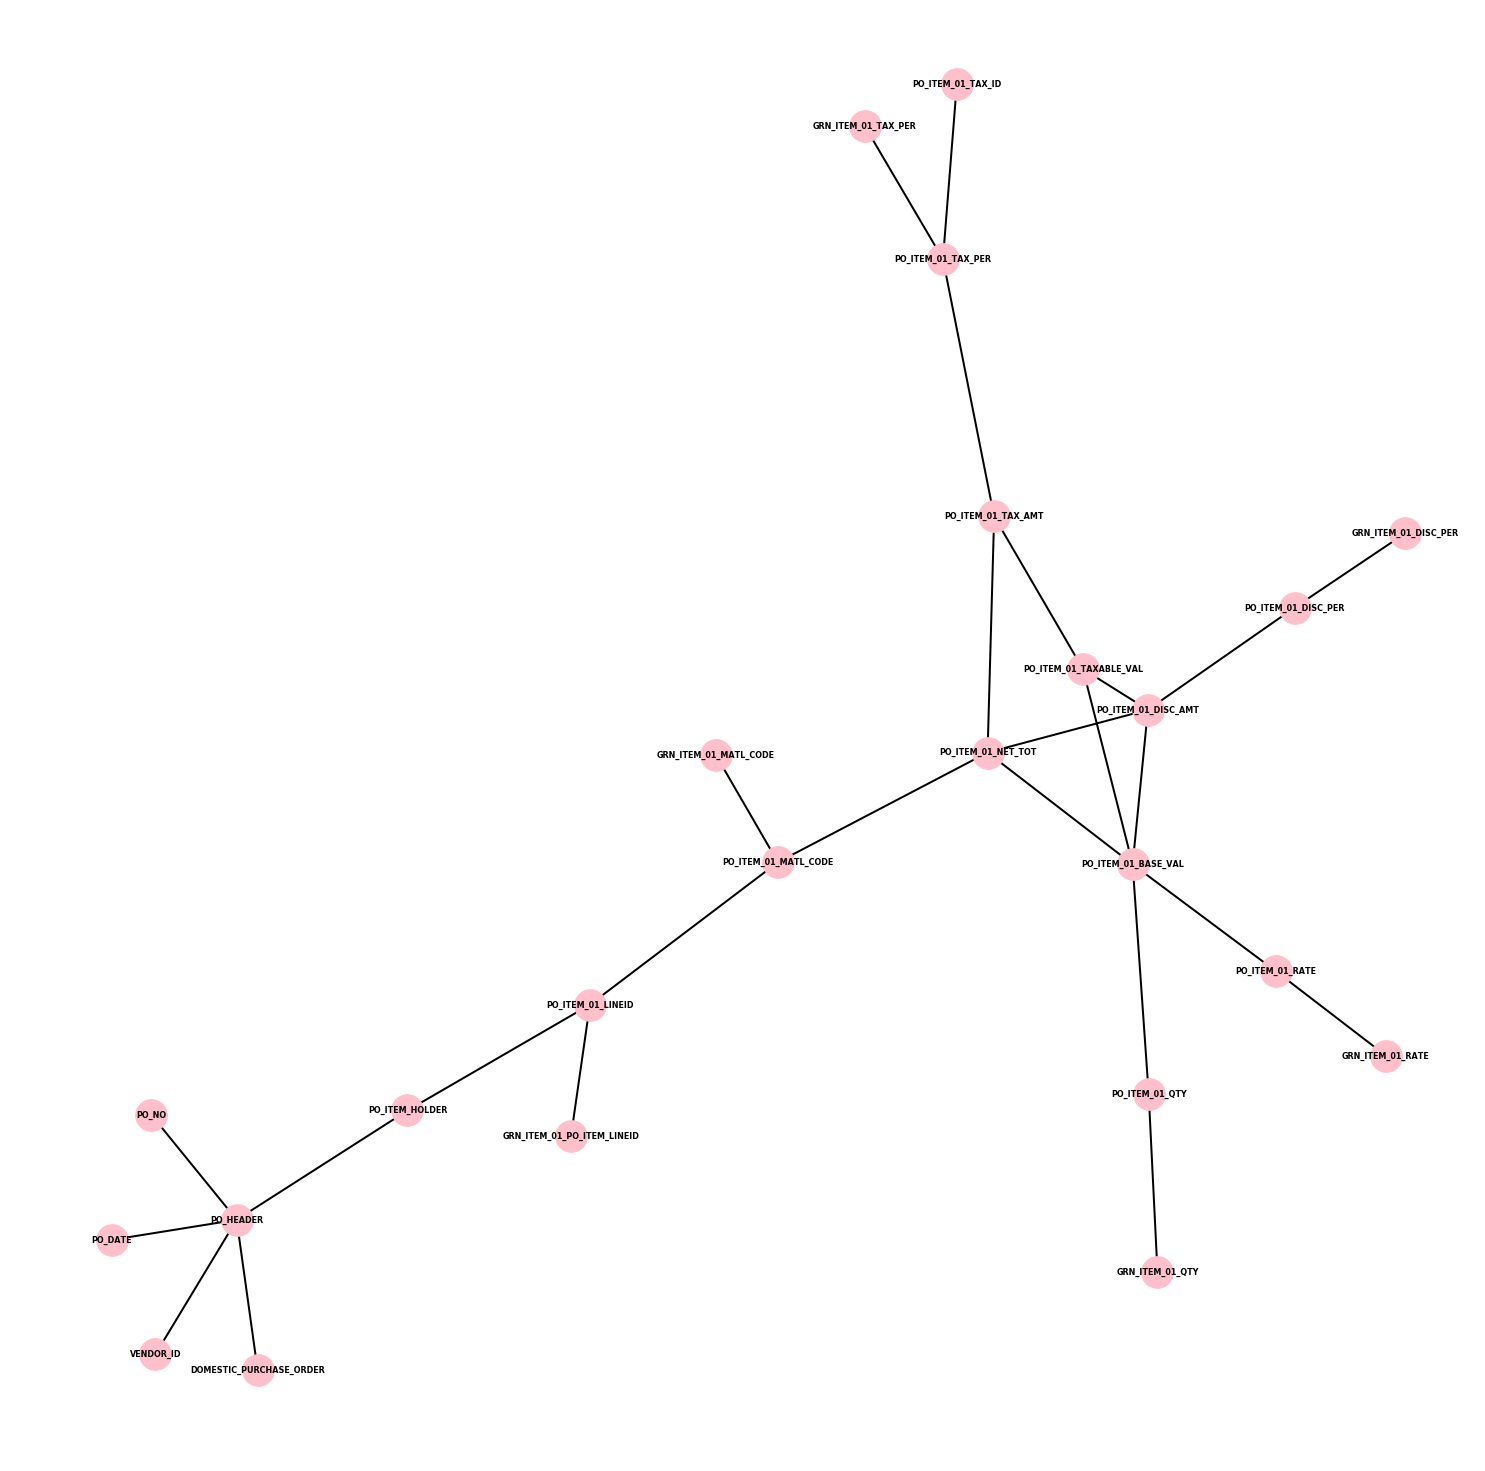

In [32]:
### mapping nodes from neo4j
import copy
from py2neo import Graph
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
database = Graph("http://54.169.129.170:7474", password= "0neintegral@123")
ent = database.run("match (a:GROUP_COMPANY)<-[*1]-(b) return b.name as Entities").to_data_frame()
print(ent)
index=int(input("enter the index of entity:"))
find=ent.Entities[index]
print("searching nodes for entity %s" %find)
subnodes=database.run("match p=(a)<-[*1..]-(b) where a.name={x}   with b match (b)-[r]-(c) return b as NOde,r as RElationship, c as PArent; ",x=find).to_data_frame()
##DRAWING_GRAPH
import networkx as nx
G=nx.Graph()
for i in range (len(subnodes)):
     a=subnodes.NOde[i]["name"]
     b=subnodes.PArent[i]["name"]
     r=subnodes.RElationship[i]["assign"]
     G.add_edge(a,b,assign=r)
import matplotlib.pyplot as plt
plt.figure(3,figsize=(20,20))
D=nx.draw(G,node_size=1000,with_labels=True,node_color="pink",width=2,font_weight='bold',font_size=8)
plt.show()


In [33]:
a=set(G)
s=pd.DataFrame(a)
print(s)

                             0
0      DOMESTIC_PURCHASE_ORDER
1                    VENDOR_ID
2            PO_ITEM_01_LINEID
3          PO_ITEM_01_DISC_PER
4       PO_ITEM_01_TAXABLE_VAL
5         PO_ITEM_01_MATL_CODE
6                        PO_NO
7           PO_ITEM_01_TAX_PER
8          PO_ITEM_01_BASE_VAL
9                    PO_HEADER
10             GRN_ITEM_01_QTY
11                     PO_DATE
12           PO_ITEM_01_TAX_ID
13            GRN_ITEM_01_RATE
14         PO_ITEM_01_DISC_AMT
15             PO_ITEM_01_RATE
16          PO_ITEM_01_NET_TOT
17        GRN_ITEM_01_DISC_PER
18              PO_ITEM_HOLDER
19              PO_ITEM_01_QTY
20  GRN_ITEM_01_PO_ITEM_LINEID
21          PO_ITEM_01_TAX_AMT
22       GRN_ITEM_01_MATL_CODE
23         GRN_ITEM_01_TAX_PER


In [34]:
s.dtypes

0    object
dtype: object

In [56]:
for i in range(len(trans.CSV_values_s1)):
    truth=trans.CSV_values_s1[i]
    value=trans.CSV_values_s1[i]
    if value is int :
        value= trans.CSV_values_s1[i]
        truth=trans.CSV_values_s1[i]
        diff=truth-value
        G.nodes[trans.neo_header[i]]["system1"]=[value,diff,truth]
    else:
        G.nodes[trans.neo_header[i]]["system1"]=[value,truth]

In [57]:
a=G.nodes.data()
m=pd.DataFrame(a)
print(m)

                             0                                            1
0                    PO_HEADER                  {'system1': ['560', '560']}
1                    VENDOR_ID                  {'system1': ['abc', 'abc']}
2      DOMESTIC_PURCHASE_ORDER  {'system1': ['po_stock_up', 'po_stock_up']}
3               PO_ITEM_HOLDER                    {'system1': ['30', '30']}
4                      PO_DATE                    {'system1': ['25', '25']}
5                        PO_NO            {'system1': ['Ab_123', 'Ab_123']}
6            PO_ITEM_01_LINEID      {'system1': ['19jun2019', '19jun2019']}
7   GRN_ITEM_01_PO_ITEM_LINEID                    {'system1': ['32', '32']}
8         PO_ITEM_01_MATL_CODE              {'system1': ['neo45', 'neo45']}
9        GRN_ITEM_01_MATL_CODE                    {'system1': ['45', '45']}
10          PO_ITEM_01_NET_TOT            {'system1': ['Ab_254', 'Ab_254']}
11         PO_ITEM_01_DISC_AMT                    {'system1': ['10', '10']}
12         P

In [74]:
a=trans.CSV_values_s1
print(a)

0     po_stock_up
1             abc
2       19jun2019
3             oo1
4       stock_sug
5           neo45
6          Ab_123
7             234
8             453
9             560
10            600
11             25
12             12
13             72
14             10
15             10
16         Ab_254
17             20
18             30
19             20
20             32
Name: CSV_values_s1, dtype: object


In [76]:
# pd.concat([a,b],axis=1)

In [46]:
b=trans.csv_values_s2
print(b)

0     po_stock_up
1             abc
2       19jun2019
3             oo1
4       stock_sug
5           neo45
6           ab123
7             234
8             553
9             540
10            630
11             25
12             12
13             72
14             10
15             10
16         Ab_254
17             40
18             40
19             10
20             52
Name: csv_values_s2, dtype: object


In [63]:
c=(a==b)
print(c)

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8     False
9     False
10    False
11     True
12     True
13     True
14     True
15     True
16     True
17    False
18    False
19    False
20    False
dtype: bool


In [10]:
import pandas as pd
import networkx as nx
import networkx.algorithms.isomorphism as isomorphism
import matplotlib.pyplot as plt
trans =pd.read_csv('/home/siva/work/New folder/iple/mydataset/PO.csv')
trans.drop('Item_Id',axis=1,inplace=True)
trans.head()

,PO_ID,PO_Qty,PO_Rate,PO_Amount
0,PO1,2,2500,5000
1,PO1,10,1000,10000
2,PO1,20,100,2000
3,PO2,5,2500,12500
4,PO2,6,1000,6000


In [11]:
trans1 =pd.read_csv('/home/siva/work/New folder/iple/mydataset/GRN.csv')
trans1.drop('Item_Id',axis=1,inplace=True)
trans1.head()

,GRN_Id,PO_Id,GRN_Qty,GRN_Rate,GRN_Amount
0,OI1001,OI1,1,2500,2500
1,OI1002,OI1,1,2500,2500
2,OI1003,OI1,10,1000,10000
3,OI1004,OI1,10,100,1000
4,OI1005,OI1,10,100,1000


In [12]:
list_of_tuples = list(zip(trans,trans1,trans-trans1))
list_of_tuples

[('PO_ID', 'GRN_Id', 'GRN_Amount'),
 ('PO_Qty', 'PO_Id', 'GRN_Id'),
 ('PO_Rate', 'GRN_Qty', 'GRN_Qty'),
 ('PO_Amount', 'GRN_Rate', 'GRN_Rate')]

In [15]:
trans1[['GRN_Id','GRN_Qty']]

,GRN_Id,GRN_Qty
0,OI1001,1
1,OI1002,1
2,OI1003,10
3,OI1004,10
4,OI1005,10


In [46]:
trans1.GRN_Id[]

'OI1001'

In [58]:
from py2neo import Graph

In [59]:
database = Graph("http://54.169.129.170:7474", password= "0neintegral@123")

In [61]:
subnodes =database.run("match p=(a:PROCESS{name:\"DOMESTIC_PURCHASE_ORDER\"})<-[*1..]-(b) with b match (b)-[r]-(c) return b.name as NOde, type(r) as REL,c.name as PArent,b.derive as DErive;").to_data_frame()
subnodes

,DErive,NOde,PArent,REL
0,None,PO_HEADER,VENDOR_ID,process_step
1,None,PO_HEADER,VENDOR_ID,process_step
2,None,PO_HEADER,PO_ITEM_HOLDER,process_step
3,None,PO_HEADER,VENDOR_ID,process_step
4,None,PO_HEADER,PO_DATE,process_step
5,None,PO_HEADER,PO_NO,process_step
6,None,PO_HEADER,DOMESTIC_PURCHASE_ORDER,process_step
7,None,PO_HEADER,VENDOR_ID,process_step
8,None,VENDOR_ID,PO_HEADER,process_step
9,None,PO_NO,PO_HEADER,process_step


In [62]:
a=subnodes.DErive
print(a)

0                                                  None
1                                                  None
2                                                  None
3                                                  None
4                                                  None
5                                                  None
6                                                  None
7                                                  None
8                                                  None
9                                                  None
10                                                 None
11                                                 None
12                                                 None
13                                                 None
14                                                 None
15                                                 None
16                                                 None
17                                    [SEEK MAT_

In [63]:
import networkx as nx

In [64]:
for i in range (len(subnodes)):
    a=subnodes.NOde[i]
    b=subnodes.PArent[i]
    r=subnodes.REL[i]
    G.add_edge(a,b,assign=r)

In [65]:
s=list(G.nodes)

In [66]:
s[0]

'PO_HEADER'

In [75]:
data= pd.read_csv('/home/siva/work/New folder/iple/mydataset/trans.csv')
data.head()

,SYSTEMS,DOMESTIC_PURCHASE_ORDER,VENDOR_ID,PO_ITEM_01_LINEID,PO_ITEM_01_DISC_PER,PO_ITEM_01_TAXABLE_VAL,PO_ITEM_01_MATL_CODE,PO_NO,PO_ITEM_01_TAX_PER,PO_ITEM_01_BASE_VAL,...,PO_ITEM_01_DISC_AMT,PO_ITEM_01_RATE,PO_ITEM_01_NET_TOT,GRN_ITEM_01_DISC_PER,PO_ITEM_HOLDER,PO_ITEM_01_QTY,GRN_ITEM_01_PO_ITEM_LINEID,PO_ITEM_01_TAX_AMT,GRN_ITEM_01_MATL_CODE,GRN_ITEM_01_TAX_PER
0,ideamed,POI_1,ewt,as32,44,533,435,43,34,32,...,43,21,532,34,aa22,20,fd43,65,33fw,21
1,netsuite,POI_1,aavv33,ws43,54,353,434,34,43,54,...,543,21,432,12,ww33,43,gfds44,54,fse22,32


In [69]:
data.dtypes

SYSTEMS                       object
DOMESTIC_PURCHASE_ORDER       object
VENDOR_ID                     object
PO_ITEM_01_LINEID             object
PO_ITEM_01_DISC_PER            int64
PO_ITEM_01_TAXABLE_VAL         int64
PO_ITEM_01_MATL_CODE           int64
PO_NO                          int64
PO_ITEM_01_TAX_PER             int64
PO_ITEM_01_BASE_VAL            int64
PO_HEADER                     object
GRN_ITEM_01_QTY                int64
PO_DATE                       object
PO_ITEM_01_TAX_ID             object
GRN_ITEM_01_RATE               int64
PO_ITEM_01_DISC_AMT            int64
PO_ITEM_01_RATE                int64
PO_ITEM_01_NET_TOT             int64
GRN_ITEM_01_DISC_PER           int64
PO_ITEM_HOLDER                object
PO_ITEM_01_QTY                 int64
GRN_ITEM_01_PO_ITEM_LINEID    object
PO_ITEM_01_TAX_AMT             int64
GRN_ITEM_01_MATL_CODE         object
GRN_ITEM_01_TAX_PER            int64
dtype: object

In [76]:
data.head()

,SYSTEMS,DOMESTIC_PURCHASE_ORDER,VENDOR_ID,PO_ITEM_01_LINEID,PO_ITEM_01_DISC_PER,PO_ITEM_01_TAXABLE_VAL,PO_ITEM_01_MATL_CODE,PO_NO,PO_ITEM_01_TAX_PER,PO_ITEM_01_BASE_VAL,...,PO_ITEM_01_DISC_AMT,PO_ITEM_01_RATE,PO_ITEM_01_NET_TOT,GRN_ITEM_01_DISC_PER,PO_ITEM_HOLDER,PO_ITEM_01_QTY,GRN_ITEM_01_PO_ITEM_LINEID,PO_ITEM_01_TAX_AMT,GRN_ITEM_01_MATL_CODE,GRN_ITEM_01_TAX_PER
0,ideamed,POI_1,ewt,as32,44,533,435,43,34,32,...,43,21,532,34,aa22,20,fd43,65,33fw,21
1,netsuite,POI_1,aavv33,ws43,54,353,434,34,43,54,...,543,21,432,12,ww33,43,gfds44,54,fse22,32


In [78]:
truth={'SYSTEMS':"ideamed", 'DOMESTIC_PURCHASE_ORDER':"POI_1", 'VENDOR_ID':"aavv33", 'PO_ITEM_01_LINEID':"ws43",
       'PO_ITEM_01_DISC_PER':44, 'PO_ITEM_01_TAXABLE_VAL':533, 'PO_ITEM_01_MATL_CODE':435,
       'PO_NO':34, 'PO_ITEM_01_TAX_PER':34, 'PO_ITEM_01_BASE_VAL':54, 'PO_HEADER':"Poi-1",
       'GRN_ITEM_01_QTY':32, 'PO_DATE':"13sep19", 'PO_ITEM_01_TAX_ID':"fs32", 'GRN_ITEM_01_RATE':21,
       'PO_ITEM_01_DISC_AMT':543, 'PO_ITEM_01_RATE':21, 'PO_ITEM_01_NET_TOT':532,
       'GRN_ITEM_01_DISC_PER':34, 'PO_ITEM_HOLDER':"aa22", 'PO_ITEM_01_QTY':43,
       'GRN_ITEM_01_PO_ITEM_LINEID':"fd43", 'PO_ITEM_01_TAX_AMT':54,
       'GRN_ITEM_01_MATL_CODE':"fse22", 'GRN_ITEM_01_TAX_PER':21}

In [23]:
# truth={"DOMESTIC_PURCHASE":"PURCHASE_ITEMS","GRN_ITEM_$1_DISC_PER":10,"GRN_ITEM_$1_QTY":60,"GRN_ITEM_$1_RATE":10,
#       "GRN_ITEM_$1_TAX_PER":6,"PO_DATE":"18-05-2018","PO_HEADER":"Po1543","PO_ITEM_$1_BASE_VAL":350,"PO_ITEM_$1_DISC_AMT":15
#       }

In [79]:
data.columns

Index(['SYSTEMS', 'DOMESTIC_PURCHASE_ORDER', 'VENDOR_ID', 'PO_ITEM_01_LINEID',
       'PO_ITEM_01_DISC_PER', 'PO_ITEM_01_TAXABLE_VAL', 'PO_ITEM_01_MATL_CODE',
       'PO_NO', 'PO_ITEM_01_TAX_PER', 'PO_ITEM_01_BASE_VAL', 'PO_HEADER',
       'GRN_ITEM_01_QTY', 'PO_DATE', 'PO_ITEM_01_TAX_ID', 'GRN_ITEM_01_RATE',
       'PO_ITEM_01_DISC_AMT', 'PO_ITEM_01_RATE', 'PO_ITEM_01_NET_TOT',
       'GRN_ITEM_01_DISC_PER', 'PO_ITEM_HOLDER', 'PO_ITEM_01_QTY',
       'GRN_ITEM_01_PO_ITEM_LINEID', 'PO_ITEM_01_TAX_AMT',
       'GRN_ITEM_01_MATL_CODE', 'GRN_ITEM_01_TAX_PER'],
      dtype='object')

In [83]:
truth={}
for i in range(len(data.columns)):
    truth[data.columns[i]]= data[data.columns[i]][0]
    

In [84]:
truth

{'SYSTEMS': 'ideamed',
 'DOMESTIC_PURCHASE_ORDER': 'POI_1',
 'VENDOR_ID': 'ewt',
 'PO_ITEM_01_LINEID': 'as32',
 'PO_ITEM_01_DISC_PER': 44,
 'PO_ITEM_01_TAXABLE_VAL': 533,
 'PO_ITEM_01_MATL_CODE': 435,
 'PO_NO': 43,
 'PO_ITEM_01_TAX_PER': 34,
 'PO_ITEM_01_BASE_VAL': 32,
 'PO_HEADER': 'Poi-1',
 'GRN_ITEM_01_QTY': 21,
 'PO_DATE': '13sep19',
 'PO_ITEM_01_TAX_ID': 'fs32',
 'GRN_ITEM_01_RATE': 21,
 'PO_ITEM_01_DISC_AMT': 43,
 'PO_ITEM_01_RATE': 21,
 'PO_ITEM_01_NET_TOT': 532,
 'GRN_ITEM_01_DISC_PER': 34,
 'PO_ITEM_HOLDER': 'aa22',
 'PO_ITEM_01_QTY': 20,
 'GRN_ITEM_01_PO_ITEM_LINEID': 'fd43',
 'PO_ITEM_01_TAX_AMT': 65,
 'GRN_ITEM_01_MATL_CODE': '33fw',
 'GRN_ITEM_01_TAX_PER': 21}

In [85]:
import numpy

In [86]:
for i in range(len(s)):
    true=truth[s[i]]
    value=data[s[i]][0]
    print(type(value)==numpy.int64)
    if type(value) == numpy.int64:
        diff=true-value
        if diff ==0:
            err_l=0
        else:
            err_l=1
        G.nodes[s[i]][data.SYSTEMS[0]]=[true,value,err_l]
    else:
        G.nodes[s[i]][data.SYSTEMS[0]]=[true,value]

False
False
False
False
False
True
False
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
False


In [87]:
G.nodes.data()

NodeDataView({'PO_HEADER': {'system1': ['560', '560'], 'ideamed': ['Poi-1', 'Poi-1']}, 'VENDOR_ID': {'system1': ['abc', 'abc'], 'ideamed': ['ewt', 'ewt']}, 'DOMESTIC_PURCHASE_ORDER': {'system1': ['po_stock_up', 'po_stock_up'], 'ideamed': ['POI_1', 'POI_1']}, 'PO_ITEM_HOLDER': {'system1': ['30', '30'], 'ideamed': ['aa22', 'aa22']}, 'PO_DATE': {'system1': ['25', '25'], 'ideamed': ['13sep19', '13sep19']}, 'PO_NO': {'system1': ['Ab_123', 'Ab_123'], 'ideamed': [43, 43, 0]}, 'PO_ITEM_01_LINEID': {'system1': ['19jun2019', '19jun2019'], 'ideamed': ['as32', 'as32']}, 'GRN_ITEM_01_PO_ITEM_LINEID': {'system1': ['32', '32'], 'ideamed': ['fd43', 'fd43']}, 'PO_ITEM_01_MATL_CODE': {'system1': ['neo45', 'neo45'], 'ideamed': [435, 435, 0]}, 'GRN_ITEM_01_MATL_CODE': {'system1': ['45', '45'], 'ideamed': ['33fw', '33fw']}, 'PO_ITEM_01_NET_TOT': {'system1': ['Ab_254', 'Ab_254'], 'ideamed': [532, 532, 0]}, 'PO_ITEM_01_DISC_AMT': {'system1': ['10', '10'], 'ideamed': [43, 43, 0]}, 'PO_ITEM_01_BASE_VAL': {'sys

In [88]:
import numpy

##adding truth value to the node property
for i in range(len(s)):
    true=truth[s[i]]
    value=data[s[i]][0]
    #print(type(value)==numpy.int64)
    if type(value) == numpy.int64:
        diff=true-value
        if diff ==0:
            err_l=0
        else:
            err_l=1
        G.nodes[s[i]]["name"]=s[i]
        G.nodes[s[i]][data.SYSTEMS[0]]={"TRUTH":true,"SYSTEM":value,"DIFF_T":diff,"ERR_T":err_l}
    else:
        if true == value:
            err_l=0
        else:
            err_l=1
        G.nodes[s[i]]["name"]=s[i]
        G.nodes[s[i]][data.SYSTEMS[0]]={"TRUTH":true,"SYSTEM":value,"ERR_T":err_l}

G.nodes.data()

NodeDataView({'PO_HEADER': {'system1': ['560', '560'], 'ideamed': {'TRUTH': 'Poi-1', 'SYSTEM': 'Poi-1', 'ERR_T': 0}, 'name': 'PO_HEADER'}, 'VENDOR_ID': {'system1': ['abc', 'abc'], 'ideamed': {'TRUTH': 'ewt', 'SYSTEM': 'ewt', 'ERR_T': 0}, 'name': 'VENDOR_ID'}, 'DOMESTIC_PURCHASE_ORDER': {'system1': ['po_stock_up', 'po_stock_up'], 'ideamed': {'TRUTH': 'POI_1', 'SYSTEM': 'POI_1', 'ERR_T': 0}, 'name': 'DOMESTIC_PURCHASE_ORDER'}, 'PO_ITEM_HOLDER': {'system1': ['30', '30'], 'ideamed': {'TRUTH': 'aa22', 'SYSTEM': 'aa22', 'ERR_T': 0}, 'name': 'PO_ITEM_HOLDER'}, 'PO_DATE': {'system1': ['25', '25'], 'ideamed': {'TRUTH': '13sep19', 'SYSTEM': '13sep19', 'ERR_T': 0}, 'name': 'PO_DATE'}, 'PO_NO': {'system1': ['Ab_123', 'Ab_123'], 'ideamed': {'TRUTH': 43, 'SYSTEM': 43, 'DIFF_T': 0, 'ERR_T': 0}, 'name': 'PO_NO'}, 'PO_ITEM_01_LINEID': {'system1': ['19jun2019', '19jun2019'], 'ideamed': {'TRUTH': 'as32', 'SYSTEM': 'as32', 'ERR_T': 0}, 'name': 'PO_ITEM_01_LINEID'}, 'GRN_ITEM_01_PO_ITEM_LINEID': {'system1'

In [98]:
G.nodes()

NodeView(('PO_HEADER', 'VENDOR_ID', 'DOMESTIC_PURCHASE_ORDER', 'PO_ITEM_HOLDER', 'PO_DATE', 'PO_NO', 'PO_ITEM_01_LINEID', 'GRN_ITEM_01_PO_ITEM_LINEID', 'PO_ITEM_01_MATL_CODE', 'GRN_ITEM_01_MATL_CODE', 'PO_ITEM_01_NET_TOT', 'PO_ITEM_01_DISC_AMT', 'PO_ITEM_01_BASE_VAL', 'PO_ITEM_01_TAX_AMT', 'PO_ITEM_01_TAX_PER', 'PO_ITEM_01_TAXABLE_VAL', 'PO_ITEM_01_DISC_PER', 'GRN_ITEM_01_DISC_PER', 'PO_ITEM_01_RATE', 'PO_ITEM_01_QTY', 'GRN_ITEM_01_QTY', 'GRN_ITEM_01_RATE', 'GRN_ITEM_01_TAX_PER', 'PO_ITEM_01_TAX_ID'))

In [115]:
def derivefromexp(string1,derive):
    import regex as re
    string=string1.replace("%","*.01")
    regex=re.compile(r"\(.*\)")
    regex1=re.compile(r"[a-zA-Z0-9_$%]+")
    mo=regex.search(string)
    mo1=regex1.search(string)
    variable=mo1.group()
    exp=mo.group()
    obj=re.compile(r"([a-zA-Z0-9_$%.]+)")
    exp1=obj.sub(r"derive['\1']",exp)
    V=eval(exp1)
    return variable,V;
    #except TypeError:
     #   return None
    ##   return None
    #except AttributeError:
      #  return None


In [92]:
L=list(G.nodes())

In [96]:
## dictionary of variables used for evaluating expression from derive
derive={".01":.01}
for i in range(len(L)):
    item=G.nodes[L[i]]["ideamed"]["SYSTEM"]
    if type(item)==numpy.int64:
        derive[L[i]]=item
    else:
        pass
    

In [103]:
D_table= pd.DataFrame(data=subnodes[["NOde","DErive"]]).drop_duplicates()

In [104]:
nodes=list(set(list(subnodes["NOde"])+list(subnodes["PArent"])))

In [105]:
nodes

['DOMESTIC_PURCHASE_ORDER',
 'VENDOR_ID',
 'PO_ITEM_01_LINEID',
 'PO_ITEM_01_DISC_PER',
 'PO_ITEM_01_TAXABLE_VAL',
 'PO_ITEM_01_MATL_CODE',
 'PO_NO',
 'PO_ITEM_01_TAX_PER',
 'PO_ITEM_01_BASE_VAL',
 'PO_HEADER',
 'GRN_ITEM_01_QTY',
 'PO_DATE',
 'PO_ITEM_01_TAX_ID',
 'GRN_ITEM_01_RATE',
 'PO_ITEM_01_DISC_AMT',
 'PO_ITEM_01_RATE',
 'PO_ITEM_01_NET_TOT',
 'GRN_ITEM_01_DISC_PER',
 'PO_ITEM_HOLDER',
 'PO_ITEM_01_QTY',
 'GRN_ITEM_01_PO_ITEM_LINEID',
 'PO_ITEM_01_TAX_AMT',
 'GRN_ITEM_01_MATL_CODE',
 'GRN_ITEM_01_TAX_PER']

In [106]:
Derives=database.run("match (a) where a.name = {x} return a.name,a.derive;",x=nodes)

In [107]:
Derives.data()

[]

In [108]:
Derive_DF=D_table.set_index("NOde")

In [111]:
Derive_DF

,DErive
NOde,
PO_HEADER,None
VENDOR_ID,None
PO_NO,None
PO_DATE,None
PO_ITEM_HOLDER,None
PO_ITEM_01_LINEID,None
PO_ITEM_01_MATL_CODE,[SEEK MAT_MASTER]
PO_ITEM_01_NET_TOT,PO_ITEM_01_NET_TOT(PO_ITEM_01_BASE_VAL-PO_ITEM...
PO_ITEM_01_TAX_AMT,PO_ITEM_01_TAX_AMT(PO_ITEM_01_TAXABLE_VAL*PO_I...


In [116]:
## getting derived values from expression 
derived={}
for i in range(len(s)):
    try:
        print(Derive_DF.DErive[s[i]])
        k,value=derivefromexp(Derive_DF.DErive[s[i]],derive)
        derived[k]=value
    except TypeError:
        pass
    except KeyError:
        pass
    except AttributeError:
        pass

None
None
None
None
None
None
[SEEK MAT_MASTER]
PO_ITEM_01_NET_TOT(PO_ITEM_01_BASE_VAL-PO_ITEM_01_DISC_AMT+PO_ITEM_01_TAX_AMT)
PO_ITEM_01_DISC_AMT(PO_ITEM_01_BASE_VAL*PO_ITEM_01_DISC_PER%)
PO_ITEM_01_BASE_VAL(PO_ITEM_01_QTY*PO_ITEM_01_RATE)
PO_ITEM_01_TAX_AMT(PO_ITEM_01_TAXABLE_VAL*PO_ITEM_01_TAX_PER%)
[DETERMINE POI_TAX_ID]
PO_ITEM_01_TAXABLE_VAL(PO_ITEM_01_BASE_VAL-PO_ITEM_01_DISC_AMT)
[INPUT: EXTERNAL]
[INPUT: EXTERNAL]
[INPUT: EXTERNAL]
[FETCH: MAT_MASTER->HSN]


In [118]:
### adding derived value to the node
for i in range(len(s)):
    sys_value=G.nodes[s[i]]["ideamed"]["SYSTEM"]
    try:
        der_value=derived[s[i]]
        G.nodes[s[i]]["ideamed"]["DERIVED"]=der_value
        G.nodes[s[i]]["ideamed"]["DIFF_I"]=der_value-sys_value
        if der_value-sys_value == 0:
            G.nodes[s[i]]["ideamed"]["ERR_I"]=0
        else:
            G.nodes[s[i]]["ideamed"]["ERR_I"]=1
    except KeyError:
        der_value=sys_value
        G.nodes[s[i]]["ideamed"]["DERIVED"]=der_value     
        
    

In [119]:
G.nodes.data()

NodeDataView({'PO_HEADER': {'system1': ['560', '560'], 'ideamed': {'TRUTH': 'Poi-1', 'SYSTEM': 'Poi-1', 'ERR_T': 0, 'DERIVED': 'Poi-1'}, 'name': 'PO_HEADER'}, 'VENDOR_ID': {'system1': ['abc', 'abc'], 'ideamed': {'TRUTH': 'ewt', 'SYSTEM': 'ewt', 'ERR_T': 0, 'DERIVED': 'ewt'}, 'name': 'VENDOR_ID'}, 'DOMESTIC_PURCHASE_ORDER': {'system1': ['po_stock_up', 'po_stock_up'], 'ideamed': {'TRUTH': 'POI_1', 'SYSTEM': 'POI_1', 'ERR_T': 0, 'DERIVED': 'POI_1'}, 'name': 'DOMESTIC_PURCHASE_ORDER'}, 'PO_ITEM_HOLDER': {'system1': ['30', '30'], 'ideamed': {'TRUTH': 'aa22', 'SYSTEM': 'aa22', 'ERR_T': 0, 'DERIVED': 'aa22'}, 'name': 'PO_ITEM_HOLDER'}, 'PO_DATE': {'system1': ['25', '25'], 'ideamed': {'TRUTH': '13sep19', 'SYSTEM': '13sep19', 'ERR_T': 0, 'DERIVED': '13sep19'}, 'name': 'PO_DATE'}, 'PO_NO': {'system1': ['Ab_123', 'Ab_123'], 'ideamed': {'TRUTH': 43, 'SYSTEM': 43, 'DIFF_T': 0, 'ERR_T': 0, 'DERIVED': 43}, 'name': 'PO_NO'}, 'PO_ITEM_01_LINEID': {'system1': ['19jun2019', '19jun2019'], 'ideamed': {'TRU

In [120]:
DICT_DF={}
for i in range(len(G.nodes)):
    key=G.nodes[s[i]]["name"]
    value=G.nodes[s[i]]["ideamed"]
    DICT_DF[key]=value

In [121]:
DICT_DF

{'PO_HEADER': {'TRUTH': 'Poi-1',
  'SYSTEM': 'Poi-1',
  'ERR_T': 0,
  'DERIVED': 'Poi-1'},
 'VENDOR_ID': {'TRUTH': 'ewt', 'SYSTEM': 'ewt', 'ERR_T': 0, 'DERIVED': 'ewt'},
 'DOMESTIC_PURCHASE_ORDER': {'TRUTH': 'POI_1',
  'SYSTEM': 'POI_1',
  'ERR_T': 0,
  'DERIVED': 'POI_1'},
 'PO_ITEM_HOLDER': {'TRUTH': 'aa22',
  'SYSTEM': 'aa22',
  'ERR_T': 0,
  'DERIVED': 'aa22'},
 'PO_DATE': {'TRUTH': '13sep19',
  'SYSTEM': '13sep19',
  'ERR_T': 0,
  'DERIVED': '13sep19'},
 'PO_NO': {'TRUTH': 43, 'SYSTEM': 43, 'DIFF_T': 0, 'ERR_T': 0, 'DERIVED': 43},
 'PO_ITEM_01_LINEID': {'TRUTH': 'as32',
  'SYSTEM': 'as32',
  'ERR_T': 0,
  'DERIVED': 'as32'},
 'GRN_ITEM_01_PO_ITEM_LINEID': {'TRUTH': 'fd43',
  'SYSTEM': 'fd43',
  'ERR_T': 0,
  'DERIVED': 'fd43'},
 'PO_ITEM_01_MATL_CODE': {'TRUTH': 435,
  'SYSTEM': 435,
  'DIFF_T': 0,
  'ERR_T': 0,
  'DERIVED': 435},
 'GRN_ITEM_01_MATL_CODE': {'TRUTH': '33fw',
  'SYSTEM': '33fw',
  'ERR_T': 0,
  'DERIVED': '33fw'},
 'PO_ITEM_01_NET_TOT': {'TRUTH': 532,
  'SYSTEM': 53

In [122]:
DF=pd.DataFrame(DICT_DF)

DF

,PO_HEADER,VENDOR_ID,DOMESTIC_PURCHASE_ORDER,PO_ITEM_HOLDER,PO_DATE,PO_NO,PO_ITEM_01_LINEID,GRN_ITEM_01_PO_ITEM_LINEID,PO_ITEM_01_MATL_CODE,GRN_ITEM_01_MATL_CODE,...,PO_ITEM_01_TAX_PER,PO_ITEM_01_TAXABLE_VAL,PO_ITEM_01_DISC_PER,GRN_ITEM_01_DISC_PER,PO_ITEM_01_RATE,PO_ITEM_01_QTY,GRN_ITEM_01_QTY,GRN_ITEM_01_RATE,GRN_ITEM_01_TAX_PER,PO_ITEM_01_TAX_ID
DERIVED,Poi-1,ewt,POI_1,aa22,13sep19,43.0,as32,fd43,435.0,33fw,...,34.0,-11,44.0,34.0,21.0,20.0,21.0,21.0,21.0,fs32
DIFF_I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIFF_T,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
ERR_I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERR_T,0,0,0,0,0,0.0,0,0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
SYSTEM,Poi-1,ewt,POI_1,aa22,13sep19,43.0,as32,fd43,435.0,33fw,...,34.0,533,44.0,34.0,21.0,20.0,21.0,21.0,21.0,fs32
TRUTH,Poi-1,ewt,POI_1,aa22,13sep19,43.0,as32,fd43,435.0,33fw,...,34.0,533,44.0,34.0,21.0,20.0,21.0,21.0,21.0,fs32
